# Experimenting with Online Retail II dataset (https://archive.ics.uci.edu/dataset/502/online+retail+ii)
### downloaded from UC Irvine Machine Learning Repository
### by D. Brian Barco on Thu 06-Nov-2025 @ 16h50

## 1. Import needed libraries

In [1]:
import pandas as pd
import numpy as np

## 2. Pre-process data

In [2]:
# need this dependency to open excel file (uncomment to run)
#!pip install openpyxl

### 2.1 Load data from Excel spreadsheet into 2 separate pandas dataframes

In [3]:
file_path = './online_retail_II.xlsx'

print("Loading data from 'Year 2009-2010' worksheet...")
df_2009_2010 = pd.read_excel(
    file_path, 
    sheet_name='Year 2009-2010'
)

print("Loading data from 'Year 2010-2011' worksheet...")
df_2010_2011 = pd.read_excel(
    file_path, 
    sheet_name='Year 2010-2011'
)

print("Loaded 2 worksheets successfully!")

Loading data from 'Year 2009-2010' worksheet...
Loading data from 'Year 2010-2011' worksheet...
Loaded 2 worksheets successfully!


In [4]:
df_2009_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df_2010_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### 2.2 Concatenate the 2 dataframes into a single dataframe

In [6]:
df = pd.concat([df_2009_2010, df_2010_2011], ignore_index = True)
print("\n--- Initial Combined Dataset Summary ---")
print(f"Total rows before handling duplicates: {len(df):,}")


--- Initial Combined Dataset Summary ---
Total rows before handling duplicates: 1,067,371


In [7]:
len(df_2010_2011)

541910

In [8]:
len(df_2009_2010)

525461

In [9]:
len(df_2009_2010) + len(df_2010_2011)

1067371

### 2.3 Remove (drop) duplicates

In [10]:
df = df.drop_duplicates(keep = 'first')

### 2.4 Check combined dataframe

In [11]:
print(f"Total rows after removing duplicates: {len(df):,}")
print("\nFirst 5 rows of the cleaned dataset:")
print(df.head())
print("\nDataset Information (Data Types, Null Counts):")
df.info()

Total rows after removing duplicates: 1,033,036

First 5 rows of the cleaned dataset:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  

Dataset Information (Data Types, Null Counts):
<class 'pandas.core.frame.DataFrame'>
Index: 1033036 entries, 0 to 1067370
Data colum

> Stopping here Thu 06-Nov-2025 @ 21h45 --DBB

> Continuing briefly on Sat 08-Nov-2025 @ 19h00 - 20h00
> while working on Risks & Limitations section of README.md file. -- DBB

In [12]:
country_counts = df['Country'].value_counts()
print(country_counts)

Country
United Kingdom          948321
EIRE                     17667
Germany                  17339
France                   14025
Netherlands               5137
Spain                     3754
Switzerland               3175
Belgium                   3110
Portugal                  2528
Australia                 1890
Channel Islands           1646
Italy                     1507
Sweden                    1362
Norway                    1308
Cyprus                    1157
Finland                   1049
Austria                    938
Denmark                    797
Unspecified                752
Greece                     663
Japan                      565
USA                        535
Poland                     527
United Arab Emirates       500
Israel                     368
Hong Kong                  360
Singapore                  346
Malta                      299
Canada                     228
Iceland                    222
RSA                        169
Lithuania                  154


In [13]:
canada_count = df[df['Country'] == 'Canada'].shape[0] # <-- to print for a country
print(canada_count)

228


> continuing on Mon 10-Nov-2025 @ 18h00 by DBB

### 2.5 Handle missing values (NaNs)

In [16]:
# Transactions without a 'Customer ID' are usually "guest" purchases. Drop these rows are they are generally
# not usable for tasks like RFM (Recency, Frequency, Monetary) analysis or Customer Segmentation
# Check for missing values
print("No. of missing values = ", df.isnull().sum())

No. of missing values =  Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [ ]:
# 1. Drop rows where 'Customer ID' is missing
df.dropna(subset = ['Customer ID'], inplace = True)

# 2. Drop rows where 'Description' is missing
df.dropna(subset = ['Description'], inplace = True)

print("No. of rows in df = ", len(df))

No. of rows in df =  797885


In [17]:
# Convert 'Customer ID' to integer (it was likely float due to NaNs)
df['Customer ID'] = df['Customer ID'].astype(int)

### 2.6 Calculate Total Sales

In [18]:
df['Sales'] = df['Quantity'] * df['Price']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  int64         
 7   Country      797885 non-null  object        
 8   Sales        797885 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 60.9+ MB


### 2.7 Handle returns / cancelled transactions (including the corresponding purchase transaction)

In [21]:
# following code block from Google Gemini Flash 2.5
# handles cancellations (both purchase & corresponding sale transaction)
# Create a boolean mask for canceled transactions (Invoice starts with 'C')
is_canceled = df['Invoice'].astype(str).str.startswith('C')

# Separate the canceled transactions from the rest
df_canceled = df[is_canceled].copy()
df_sales = df[~is_canceled].copy()

# A return transaction has a negative quantity, but we already filtered by 'C'

# To remove the original order items:
# 1. Create a unique identifier for the item/customer being returned.
df_canceled['StockCode_CustomerID'] = df_canceled['StockCode'].astype(str) + '_' + df_canceled['Customer ID'].astype(str)
df_sales['StockCode_CustomerID'] = df_sales['StockCode'].astype(str) + '_' + df_sales['Customer ID'].astype(str)

# 2. Identify all unique items that were ever canceled.
canceled_items = df_canceled['StockCode_CustomerID'].unique()

# 3. Filter out those items from the sales DataFrame.
df_clean = df_sales[~df_sales['StockCode_CustomerID'].isin(canceled_items)].copy()

# Drop the temporary column
df_clean.drop(columns=['StockCode_CustomerID'], inplace=True)

print(f"Original Combined Rows: {len(df)}")
print(f"Cleaned Sales Rows (after removing Canceled/Returned and Original Orders): {len(df_clean)}")

# Replace the old combined dataframe with the new clean one
df = df_clean

Original Combined Rows: 797885
Cleaned Sales Rows (after removing Canceled/Returned and Original Orders): 734583


### 2.8 Handle negative Quantity and / or negative Unit Price

In [22]:
# 1. Filter out rows where Quantity is less than or equal to zero
df = df[df['Quantity'] > 0]

# 2. Filter out rows where Price (UnitPrice) is less than or equal to zero
df = df[df['Price'] > 0]

print(f"Rows remaining after filtering invalid Quantity/Price: {len(df)}")

Rows remaining after filtering invalid Quantity/Price: 734527


### 2.9 Final Data Type checks (Note: can safely DELETE this... the data types are already ok)

In [24]:
# 1. Customer ID --> int
df['Customer ID'] = df['Customer ID'].astype(int)

# 2. InvoiceDate --> datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print("\nFinal Data Types:")
print(df.dtypes)


Final Data Types:
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID             int64
Country                object
Sales                 float64
dtype: object


## 3. RFM metrics (Recency, Frequency, Monetary)

### 3.1 Define snapshot date

In [25]:
# Convert InvoiceDate to datetime objects (done in previous steps, but good practice to ensure)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Find the latest transaction date and add one day to set the 'snapshot date'
latest_date = df['InvoiceDate'].max()
snapshot_date = latest_date + pd.Timedelta(days=1)

print(f"Latest Transaction Date: {latest_date}")
print(f"Snapshot Date for RFM calculation: {snapshot_date}")

Latest Transaction Date: 2011-12-09 12:50:00
Snapshot Date for RFM calculation: 2011-12-10 12:50:00


### 3.2 Calculate RFM metrics

Use the groupby() function on the CustomerID column to aggregate the data and calculate the three metrics:  
Recency (R): The number of days between the customer's last purchase and the snapshot_date.  
Frequency (F): The total number of unique invoices (transactions) made by the customer.  
Monetary (M): The sum of the Sales (total revenue) generated by the customer.

In [28]:
# Calculate R, F, M
rfm_df = df.groupby('Customer ID').agg(
    # Recency: Calculate the difference in days between the snapshot date and the max purchase date
    Recency=('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
    
    # Frequency: Count the number of unique invoices
    Frequency=('Invoice', 'nunique'),
    
    # Monetary: Sum the TotalPrice
    Monetary=('Sales', 'sum')
).reset_index()

# Display the first few rows of the RFM table
print("\nRFM DataFrame Head:")
print(rfm_df.head())
print("\nRFM DataFrame Info:")
print(rfm_df.info())


RFM DataFrame Head:
   Customer ID  Recency  Frequency  Monetary
0        12346      529          3    170.36
1        12347        2          8   4921.53
2        12348       75          5   2019.40
3        12349       19          4   4155.99
4        12350      310          1    334.40

RFM DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5833 entries, 0 to 5832
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5833 non-null   int64  
 1   Recency      5833 non-null   int64  
 2   Frequency    5833 non-null   int64  
 3   Monetary     5833 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 182.4 KB
None


### 3.3 Determine RFM Quartiles (Scoring)

To segment customers, we assign a score from 1 to 4 (or 5) for each metric, often using quartiles.  
Recency: Lower the days, higher the score (e.g., score 4 for the most recent buyers).  
Frequency/Monetary: Higher the value, higher the score (e.g., score 4 for the most frequent/highest spending buyers).

In [ ]:
### This cell outputs errors! Do not run! (Run cell below instead) ###

# Create quartiles (4 bins) for Recency, Frequency, and Monetary
# Note: qcut handles ties better than cut for non-uniform distributions
r_labels = range(4, 0, -1) # Recency: 4=highest, 1=lowest (reversed order)
f_m_labels = range(1, 5)   # F/M: 1=lowest, 4=highest

# Apply the quartile scoring
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=4, labels=r_labels, duplicates = 'drop').astype(int)
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], q=4, labels=f_m_labels, duplicates = 'drop').astype(int)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], q=4, labels=f_m_labels, duplicates = 'drop').astype(int)

# Combine the scores to create the final RFM_Score (e.g., 444, 123)
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

print(rfm_df.head())

In [31]:
# --- The Robust Fix for RFM Scoring ---

# Labels remain the same
r_labels = range(4, 0, -1) # Recency: 4=highest, 1=lowest (reversed order)
f_m_labels = range(1, 5)   # F/M: 1=lowest, 4=highest

# Apply the quartile scoring using the .rank(method='first') trick:
# This creates a unique value for every row, forcing qcut to create 4 perfect bins.
rfm_df['R_Score'] = pd.qcut(
    rfm_df['Recency'].rank(method='first'), # Rank ensures unique values for qcut
    q=4, 
    labels=r_labels
).astype(int)

rfm_df['F_Score'] = pd.qcut(
    rfm_df['Frequency'].rank(method='first'),
    q=4, 
    labels=f_m_labels
).astype(int)

rfm_df['M_Score'] = pd.qcut(
    rfm_df['Monetary'].rank(method='first'),
    q=4, 
    labels=f_m_labels
).astype(int)

# Combine the scores to create the final RFM_Score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

print("\n✅ RFM Scores calculated successfully using the ranking method.")
print("\nFirst 10 Customers with Scores:")
print(rfm_df.head(10))


✅ RFM Scores calculated successfully using the ranking method.

First 10 Customers with Scores:
   Customer ID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0        12346      529          3    170.36        1        2        1   
1        12347        2          8   4921.53        4        4        4   
2        12348       75          5   2019.40        3        3        3   
3        12349       19          4   4155.99        4        3        4   
4        12350      310          1    334.40        2        1        2   
5        12351      375          1    300.93        2        1        1   
6        12352       36          8   1739.18        3        4        3   
7        12353      204          2    406.76        2        2        2   
8        12354      232          1   1079.40        2        1        3   
9        12355      214          2    947.61        2        2        3   

  RFM_Score  
0       121  
1       444  
2       333  
3       434  
4      

### 3.4 Map RFM scores to segments

Segment Name	R Score	F Score	M Score	Definition  
Champions	4	4	4	Bought recently, buy often, spend the most.  
Loyal Customers	3-4	3-4	3-4	High spenders who are frequent and somewhat recent.  
Potential Loyalist	3-4	1-2	3-4	Recent customers with decent monetary value.  
New Customers	4	1	1	Bought recently, but haven't bought frequently yet.  
At Risk	1-2	3-4	3-4	Used to buy often and spend a lot, but haven't bought recently.  
Hibernating	1-2	1-2	1-2	Low-frequency, low-monetary customers who haven't bought recently.  
Can't Lose Them	1	4	4	Purchased a long time ago, but were once your best customers.

In [32]:
# Create a total RFM score for simpler analysis (0 to 12)
rfm_df['RFM_Sum'] = rfm_df['R_Score'] + rfm_df['F_Score'] + rfm_df['M_Score']

# Function to assign a segment based on R, F, and M scores
def rfm_segment(row):
    r = row['R_Score']
    f = row['F_Score']
    m = row['M_Score']
    
    # Champions/Loyal
    if r >= 4 and f >= 4 and m >= 4:
        return '01. Champions'
    elif r >= 3 and f >= 3 and m >= 3:
        return '02. Loyal Customers'
    
    # Potential/Promising
    elif r >= 4 and f >= 3:
        return '03. Potential Loyalist'
    elif r >= 4 and f >= 1 and m >= 1:
        return '04. New Customers'
    
    # Needs Attention (Low R)
    elif r <= 2 and f >= 3 and m >= 3:
        return '05. At Risk Customers'
    elif r <= 1 and f >= 4 and m >= 4:
        return '06. Can\'t Lose Them'
    
    # Lost/Hibernating
    else:
        return '07. Hibernating/Lost'

# Apply the function to create the new segmentation column
rfm_df['RFM_Level'] = rfm_df.apply(rfm_segment, axis=1)

print("✅ Customer segments assigned successfully.")
print("\nSegment Distribution:")
print(rfm_df['RFM_Level'].value_counts())
print("\nRFM DataFrame Sample:")
print(rfm_df.head())

✅ Customer segments assigned successfully.

Segment Distribution:
RFM_Level
07. Hibernating/Lost      2959
02. Loyal Customers       1154
01. Champions              641
05. At Risk Customers      638
04. New Customers          321
03. Potential Loyalist     120
Name: count, dtype: int64

RFM DataFrame Sample:
   Customer ID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0        12346      529          3    170.36        1        2        1   
1        12347        2          8   4921.53        4        4        4   
2        12348       75          5   2019.40        3        3        3   
3        12349       19          4   4155.99        4        3        4   
4        12350      310          1    334.40        2        1        2   

  RFM_Score  RFM_Sum             RFM_Level  
0       121        4  07. Hibernating/Lost  
1       444       12         01. Champions  
2       333        9   02. Loyal Customers  
3       434       11   02. Loyal Customers  
4       212  

### 3.5 Take a closer look at Segmentation

#### 3.5.1 Visualization

C:\Users\D_User\AppData\Local\Temp\ipykernel_1504\2939625007.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")


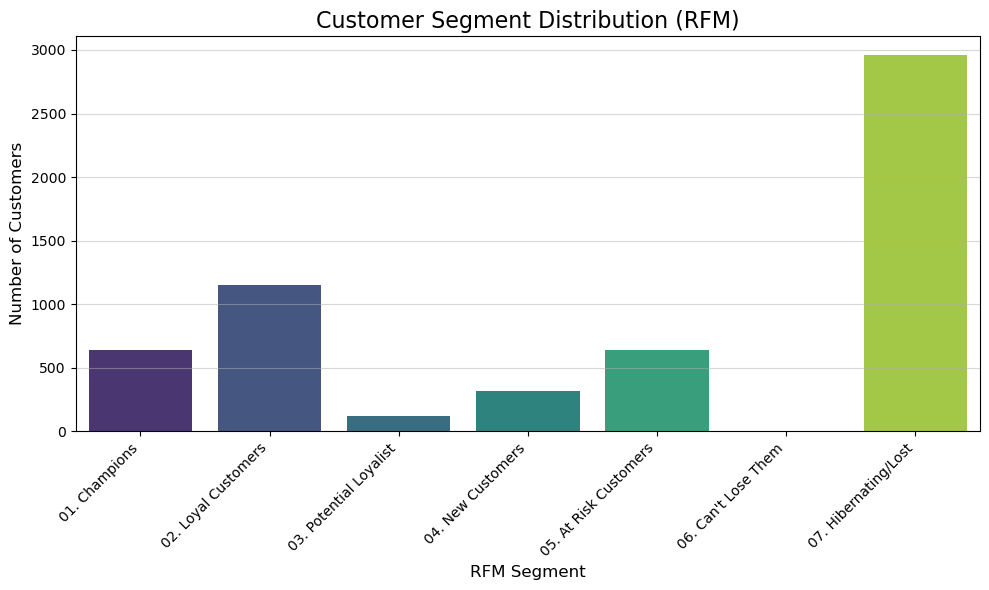

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the segments are plotted in a logical order
segment_order = [
    '01. Champions', '02. Loyal Customers', '03. Potential Loyalist', 
    '04. New Customers', '05. At Risk Customers', '06. Can\'t Lose Them', 
    '07. Hibernating/Lost'
]

# Calculate the count of customers in each segment and reindex for order
segment_counts = rfm_df['RFM_Level'].value_counts().reindex(segment_order, fill_value=0)

plt.figure(figsize=(10, 6))
# Create the bar plot
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")

plt.title('Customer Segment Distribution (RFM)', fontsize=16)
plt.xlabel('RFM Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
# Rotate labels for readability
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

#### 3.5.2 K-means Clustering

In [34]:
# For clustering algorithms like K-Means, the data must be normally distributed and scaled.
# Since Frequency and Monetary are typically heavily right-skewed, use a log transformation followed by
# standardization (scaling).

import numpy as np
from sklearn.preprocessing import StandardScaler

# Select R, F, M columns
rfm_k_means = rfm_df[['Recency', 'Frequency', 'Monetary']].copy()

# 1. Log Transformation (using log1p handles values close to zero safely)
rfm_k_means['Recency_log'] = np.log1p(rfm_k_means['Recency'])
rfm_k_means['Frequency_log'] = np.log1p(rfm_k_means['Frequency'])
rfm_k_means['Monetary_log'] = np.log1p(rfm_k_means['Monetary'])

# 2. Standardization/Scaling
scaler = StandardScaler()
# Fit and transform the log-transformed data
rfm_scaled_array = scaler.fit_transform(rfm_k_means[['Recency_log', 'Frequency_log', 'Monetary_log']])

# Create a new DataFrame for the scaled data (ready for K-Means)
rfm_scaled_df = pd.DataFrame(
    rfm_scaled_array, 
    columns=['R_scaled', 'F_scaled', 'M_scaled'], 
    index=rfm_df.index
)

print("✅ RFM data log-transformed and scaled for K-Means clustering.")
print(rfm_scaled_df.head())

✅ RFM data log-transformed and scaled for K-Means clustering.
   R_scaled  F_scaled  M_scaled
0  1.166794 -0.190615 -1.195571
1 -2.154563  0.822191  1.293091
2 -0.079866  0.315788  0.633072
3 -0.936803  0.088079  1.167813
4  0.824608 -1.056317 -0.697842


#### 3.5.3 "Elbow" Method

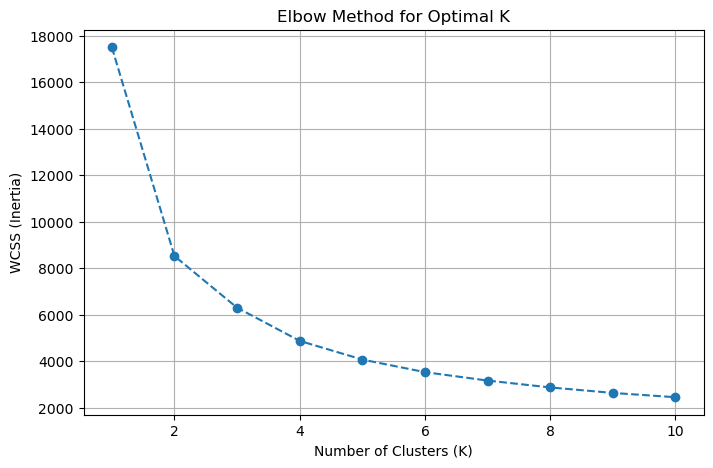

In [35]:
from sklearn.cluster import KMeans

# Select the scaled features
X_scaled = rfm_scaled_df[['R_scaled', 'F_scaled', 'M_scaled']]

wcss = []
# Test K values from 1 to 10
for i in range(1, 11):
    # Initialize KMeans
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    # Fit the model and store the inertia (WCSS)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [36]:
# Assuming the optimal K is 3 (based on Elbow plot)
optimal_k = 3

# Initialize and fit the final K-Means model
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Add the cluster label column to the scaled and original RFM DataFrames
rfm_scaled_df['Cluster_ID'] = kmeans.labels_
rfm_df['Cluster_ID'] = kmeans.labels_

print(f"✅ K-Means clustering applied with K = {optimal_k}.")
print("\nCluster Distribution:")
print(rfm_df['Cluster_ID'].value_counts().sort_index())

✅ K-Means clustering applied with K = 3.

Cluster Distribution:
Cluster_ID
0    1230
1    2302
2    2301
Name: count, dtype: int64


In [37]:
# Analyze cluster profiles
# The clusters are identified by numbers (0, 1, 2, 3), but we need to calculate the average R, F, and M values
# for each cluster to understand what kind of customers they represent (e.g., "High Spenders," "New Buyers").

# Calculate the mean of the original R, F, and M values for each cluster
cluster_analysis = rfm_df.groupby('Cluster_ID')[['Recency', 'Frequency', 'Monetary']].mean()
cluster_analysis = cluster_analysis.reset_index()

print("\nCluster Profile Analysis (Mean Values):")
print(cluster_analysis)

# Optional: Map Cluster IDs to descriptive names based on the means
# Example interpretation (requires you to examine the means above):
# If Cluster 3 has the lowest Recency, highest Frequency, and highest Monetary:
# cluster_names = {3: 'Champions', 0: 'Loyal', 2: 'At Risk', 1: 'Lost'}
# rfm_df['Cluster_Name'] = rfm_df['Cluster_ID'].map(cluster_names)


Cluster Profile Analysis (Mean Values):
   Cluster_ID     Recency  Frequency     Monetary
0           0   32.619512  18.330894  8717.847397
1           1  380.240660   1.501738   367.574536
2           2  112.661017   4.218601  1356.682450


## 4 Recommender System

### 4.1 Item-Based Collaborative Filtering
The goal is to recommend items that are statistically similar to the items a customer has already purchased.

#### 4.1.1 Step One - Create the User-Item Matrix (Review)

In [39]:
# Pivot the DatFrame to show how many units of each StockCode (item) were purchased by each CustomerID.

# Aggregate quantity purchased per customer per item
user_item_matrix = df.groupby(['Customer ID', 'StockCode'])['Quantity'].sum().unstack().fillna(0)

# Display matrix shape and a sample
print(f"User-Item Matrix Shape: {user_item_matrix.shape}")
print("User-Item Matrix Head:")
print(user_item_matrix.iloc[:5, :5]) # Display first 5 rows and 5 columns

User-Item Matrix Shape: (5833, 4617)
User-Item Matrix Head:
StockCode    10002  10080  10109  10120  10125
Customer ID                                   
12346          0.0    0.0    0.0    0.0    0.0
12347          0.0    0.0    0.0    0.0    0.0
12348          0.0    0.0    0.0    0.0    0.0
12349          0.0    0.0    0.0    0.0    0.0
12350          0.0    0.0    0.0    0.0    0.0


#### 4.1.2 Step Two - Calculate Item Similarity (The "Training")

To use Cosine Similarity, import the cosine_similarity function from sklearn.metrics.pairwise.
The cosine_similarity function expects the data to be formatted as (n_samples, n_features).
In this case, the "samples" are the items (StockCode) and the "features" are the customers (Customer ID).

Since the user_item_matrix has Customers as rows and Items as columns, we need to transpose the matrix first to calculate similarity between the items.

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. Select the User-Item Matrix
user_item_matrix = df.groupby(['Customer ID', 'StockCode'])['Quantity'].sum().unstack().fillna(0)

# 2. Transpose the matrix to calculate similarity between ITEMS (columns)
# Shape changes from (Customers, Items) to (Items, Customers)
item_matrix_transposed = user_item_matrix.T

# 3. Calculate the Cosine Similarity Matrix
# The resulting matrix will be (Items x Items)
item_similarity_array = cosine_similarity(item_matrix_transposed)

# 4. Convert the array back to a DataFrame for easy lookup, using StockCodes as labels
item_similarity_df = pd.DataFrame(
    item_similarity_array, 
    index=item_matrix_transposed.index, 
    columns=item_matrix_transposed.index
)

print("\n✅ Item Similarity Matrix calculated using Cosine Similarity.")
print(f"Matrix shape: {item_similarity_df.shape}")
print("Item Similarity DataFrame Head (first 5 items):")
print(item_similarity_df.iloc[:5, :5])


✅ Item Similarity Matrix calculated using Cosine Similarity.
Matrix shape: (4617, 4617)
Item Similarity DataFrame Head (first 5 items):
StockCode     10002     10080  10109     10120     10125
StockCode                                               
10002      1.000000  0.001442    0.0  0.004224  0.405106
10080      0.001442  1.000000    0.0  0.000157  0.008899
10109      0.000000  0.000000    1.0  0.000000  0.000000
10120      0.004224  0.000157    0.0  1.000000  0.000997
10125      0.405106  0.008899    0.0  0.000997  1.000000


#### 4.1.3 Step Three - The Recommender ("Item Similarity")
This function accepts a 'StockCode' and provides the most similar items based on the item_similarity_df. (Cosine similarity)

In [49]:
def get_item_recommendations(stock_code, n = 5):
    """
    Recommends n similar items to the given stock_code based on item-item correlation.
    """
    # 1. Check if the item exists
    if stock_code not in item_similarity_df.columns:
        print(f"Error: StockCode '{stock_code}' not found in the matrix.")
        return
        
    # 2. Get the correlation vector for the requested item
    item_corr_series = item_similarity_df[stock_code]
    
    # 3. Sort the correlation values, exclude the item itself (correlation 1.0)
    # The [1:n+1] slices out the item itself and takes the top N
    recommended_items = item_corr_series.sort_values(ascending=False)[1:n+1]
    
    # Get a mapping of StockCode to Description for readable output
    stock_desc_map = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')['Description'].to_dict()

    # 4. Prepare the final output
    print(f"\n✨ Top {n} Recommendations for item {stock_code}: {stock_desc_map[stock_code]}")

    for item, correlation in recommended_items.items():
        description = stock_desc_map.get(item, "Description Unavailable")
        print(f"- **{item}**: {description} (Correlation: {correlation:.4f})")

In [ ]:
# Example Usage:
# We need a StockCode that exists in the matrix. Let's find a popular one.
try:
    # Find the most frequently purchased item in your data
    popular_item = df['StockCode'].mode().iloc[0]
    print(f"\nRecommendation for a popular item: {popular_item}")
    get_item_recommendations(popular_item, n = 5)
    
except Exception as e:
    print(f"\nCould not run example recommendation: {e}. Please manually select a StockCode from your data.")


Running recommendation for a popular item: 85123A

✨ Top 5 Recommendations for item 85123A: CREAM HANGING HEART T-LIGHT HOLDER
- **37503**: TEA TIME CAKE STAND IN GIFT BOX (Correlation: 0.4914)
- **21733**: RED HANGING HEART T-LIGHT HOLDER (Correlation: 0.4762)
- **72760B**: VINTAGE CREAM 3 BASKET CAKE STAND (Correlation: 0.4558)
- **22057**: CERAMIC PLATE STRAWBERRY DESIGN (Correlation: 0.4521)
- **22063**: CERAMIC BOWL WITH STRAWBERRY DESIGN (Correlation: 0.4509)


In [ ]:
get_item_recommendations(35923, n = 5) # <-- can run with StockCode to get recommendations


✨ Top 5 Recommendations for item 35923: CANDY HEART HANGING DECORATION
- **71496A**: A4 WALL TIDY BLUE OFFICE (Correlation: 0.8744)
- **84402B**: PURPLE DRESS JEWELLERY STAND (Correlation: 0.8238)
- **84683**: CLASSICAL ROSE CANDLESTAND (Correlation: 0.8076)
- **72225C**: LAVENDER SCENT CAKE CANDLE (Correlation: 0.7468)
- **90141D**: ROSE PENDANT TRIPLE SHELL NECKLACE (Correlation: 0.7463)


### 4.2 User-Based Collaborative Filtering
The goal is to recommend items purchased by similar customers. The process is similar to Item-Based filtering, but the approach is to find relationships between _users_ instead of items.

Main concept: "If Customer A is similar to Customer B, and Customer B bought Item X, then recommend Item X to Customer A."

#### 4.2.1 Create the User-Item Matrix
This initial step is the same as for Item-Based filtering.  
The matrix represents the data used to define user similarity.

In [64]:
# Assuming 'df' is the (clean, combined) transaction DataFrame
# Aggregate quantity purchased per customer per item
user_item_matrix = df.groupby(['Customer ID', 'StockCode'])['Quantity'].sum().unstack().fillna(0)

print(f"User-Item Matrix Shape: {user_item_matrix.shape}")

User-Item Matrix Shape: (5833, 4617)


#### 4.2.2 Calculate User Similarity
Calculate the similarity between the rows (users) of the user_item_matrix.
Since the matrix is already in the correct format (users as rows, items as columns), there is no need to transpose it.

In [65]:
from sklearn.metrics.pairwise import cosine_similarity

# 1. Calculate the Cosine Similarity Matrix between USERS (rows)
# The resulting matrix will be (Customers x Customers)
user_similarity_array = cosine_similarity(user_item_matrix)

# 2. Convert the array back to a DataFrame for easy lookup
user_similarity_df = pd.DataFrame(
    user_similarity_array, 
    index=user_item_matrix.index, 
    columns=user_item_matrix.index
)

print("\n✅ User Similarity Matrix calculated using Cosine Similarity.")
print(f"Matrix shape: {user_similarity_df.shape}")
print("User Similarity DataFrame Head (first 5 users):")
print(user_similarity_df.iloc[:5, :5])


✅ User Similarity Matrix calculated using Cosine Similarity.
Matrix shape: (5833, 5833)
User Similarity DataFrame Head (first 5 users):
Customer ID     12346     12347     12348     12349     12350
Customer ID                                                  
12346        1.000000  0.000000  0.000000  0.051515  0.000000
12347        0.000000  1.000000  0.158534  0.013270  0.013398
12348        0.000000  0.158534  1.000000  0.000264  0.000309
12349        0.051515  0.013270  0.000264  1.000000  0.032049
12350        0.000000  0.013398  0.000309  0.032049  1.000000


#### 4.2.3 The Recommender ("User Similarity")
This function inputs a target CustomerID, determines their most similar neighbors, looks at what those neighbors bought, and recommends the items the target user <u>_has not_</u> purchased yet.

In [66]:
def get_user_recommendations(target_customer_id, n_neighbors=10, n_recommendations=5):
    """
    Recommends items to a target customer based on their most similar neighbors.
    """
    if target_customer_id not in user_similarity_df.index:
        print(f"Error: Customer ID '{target_customer_id}' not found in the matrix.")
        return

    # 1. Find the target user's purchased items
    target_user_items = set(df[df['Customer ID'] == target_customer_id]['StockCode'])
    
    # 2. Get the similarity scores for the target user, sort, and get top N neighbors
    # [1:n_neighbors+1] excludes the user themselves (similarity 1.0)
    neighbor_series = user_similarity_df[target_customer_id].sort_values(ascending=False)[1:n_neighbors+1]
    
    # 3. Aggregate all items purchased by the neighbors
    neighbor_items = {}
    
    for neighbor_id in neighbor_series.index:
        # Get items bought by the neighbor
        items_bought = df[df['Customer ID'] == neighbor_id]['StockCode'].tolist()
        
        # Count the frequency of each item among all neighbors
        for item in items_bought:
            # Only consider items the target user hasn't bought
            if item not in target_user_items:
                neighbor_items[item] = neighbor_items.get(item, 0) + 1

    # 4. Filter and sort recommendations by frequency (the number of neighbors who bought it)
    recommended_items = pd.Series(neighbor_items).sort_values(ascending=False).head(n_recommendations)

    # 5. Prepare final output with descriptions
    stock_desc_map = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')['Description'].to_dict()

    print(f"\n✨ Top {n_recommendations} Recommendations for Customer {target_customer_id}:")
    for item, count in recommended_items.items():
        description = stock_desc_map.get(item, "Description Unavailable")
        print(f"- **{item}**: {description} (Bought by {count} similar neighbors)")

In [70]:
df['Customer ID'].value_counts()

Customer ID
17841    10100
14911     8470
12748     6307
14606     5449
14096     5111
         ...  
12570        1
14613        1
13105        1
18068        1
17440        1
Name: count, Length: 5833, dtype: int64

In [67]:
# Example Usage:
# Find an active CustomerID from your data to test
try:
    # Use a CustomerID with many transactions for better results
    active_customer = df['CustomerID'].value_counts().index[0]
    print(f"\nRunning recommendation for the most active customer: {active_customer}")
    get_user_recommendations(active_customer, n_neighbors=20, n_recommendations=5)
    
except Exception as e:
    print(f"\nCould not run example recommendation: {e}. Please manually select an existing CustomerID from your data.")


Could not run example recommendation: 'CustomerID'. Please manually select an existing CustomerID from your data.


In [71]:
get_user_recommendations(17841)


✨ Top 5 Recommendations for Customer 17841:
- **85123A**: CREAM HANGING HEART T-LIGHT HOLDER (Bought by 9 similar neighbors)
- **21463**: MIRRORED DISCO BALL  (Bought by 8 similar neighbors)
- **21326**: AGED GLASS SILVER T-LIGHT HOLDER (Bought by 7 similar neighbors)
- **21892**: TRADITIONAL WOODEN CATCH CUP GAME  (Bought by 5 similar neighbors)
- **84879**: ASSORTED COLOUR BIRD ORNAMENT (Bought by 5 similar neighbors)


### 4.3 Apriori Algorithm (a.k.a. Association Rule Mining)
Apriori focuses on rules between items, regardless of who bought them.  
It finds frequent itemsets (e.g., bread and milk appear together in 50% of transactions).  
It generates rules like: If (Milk)→(Bread).  
The system uses metrics like Support, Confidence, and Lift to judge the strength of these rules.  
The typical application is Market Basket Analysis, often used for store layout or cross-promotions, not for direct user-level recommendation.

Implement the Apriori Algorithm for Market Basket Analysis using the mlxtend library in Python, as it provides clear, efficient functions for association rule mining.

Unlike Collaborative Filtering, Apriori works directly on transactional data to discover association rules (e.g., {Milk, Bread} → {Butter}).

#### 4.3.1 Data Preparation: Transaction Encoding
Apriori requires data to be in a one-hot encoded format, where each row is a transaction (Invoice) and each column is an item (StockCode). A '1' indicates the item was present in that transaction, and a '0' indicates it was not.

In [72]:
# Create a simplified DataFrame with only Invoice and StockCode
basket_df = df.groupby(['Invoice', 'StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice')

# Define an encoding function:
# If quantity is > 0, set to 1 (present), else set to 0 (absent)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

# Apply the encoding function to the entire basket DataFrame
basket_set = basket_df.applymap(encode_units)

# Remove the 'POST' item often used for shipping charges, as it skews results
if 'POST' in basket_set.columns:
    basket_set.drop(columns=['POST'], inplace=True)

print("✅ Data successfully one-hot encoded for Apriori.")
print(f"Basket set shape: {basket_set.shape}")
print(basket_set.iloc[:5, :5])

C:\Users\D_User\AppData\Local\Temp\ipykernel_1504\731678953.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_set = basket_df.applymap(encode_units)


✅ Data successfully one-hot encoded for Apriori.
Basket set shape: (35711, 4616)
StockCode  10002  10080  10109  10120  10125
Invoice                                     
489434         0      0      0      0      0
489435         0      0      0      0      0
489436         0      0      0      0      0
489437         1      0      0      0      0
489438         0      0      0      0      0


#### 4.3.2 Generate frequent item sets
Use the apriori function from mlxtend to identify frequent itemsets—groups of items that appear together in transactions often enough, based on a minimum support threshold.

In [ ]:
# Uncomment to install mlxtend package
#!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------------------------------- - 1.3/1.4 MB 16.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.0 MB/s  0:00:00


In [ ]:
from mlxtend.frequent_patterns import apriori

# **Prerequisite**: If you don't have it, run: !pip install mlxtend

# Set a minimum support value (e.g., 2% of transactions)
# This threshold is crucial and often requires tuning.
min_support = 0.02 

# Run the Apriori algorithm
frequent_itemsets = apriori(basket_set, min_support=min_support, use_colnames=True)

# Add a column for the length of the itemset (e.g., {A, B} has length 2)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print("\n✅ Frequent Itemsets Generated:")
print(frequent_itemsets.sort_values('support', ascending=False).head())

c:\Users\D_User\miniconda3\envs\dsi_participant\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


> Note: Jones' Lenovo ThinkPad laptop **FROZE** here! (previous cell i.e. apriori)

> Stopping here on Mon 10-Nov-2025 @ 22h00 by DBB